In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

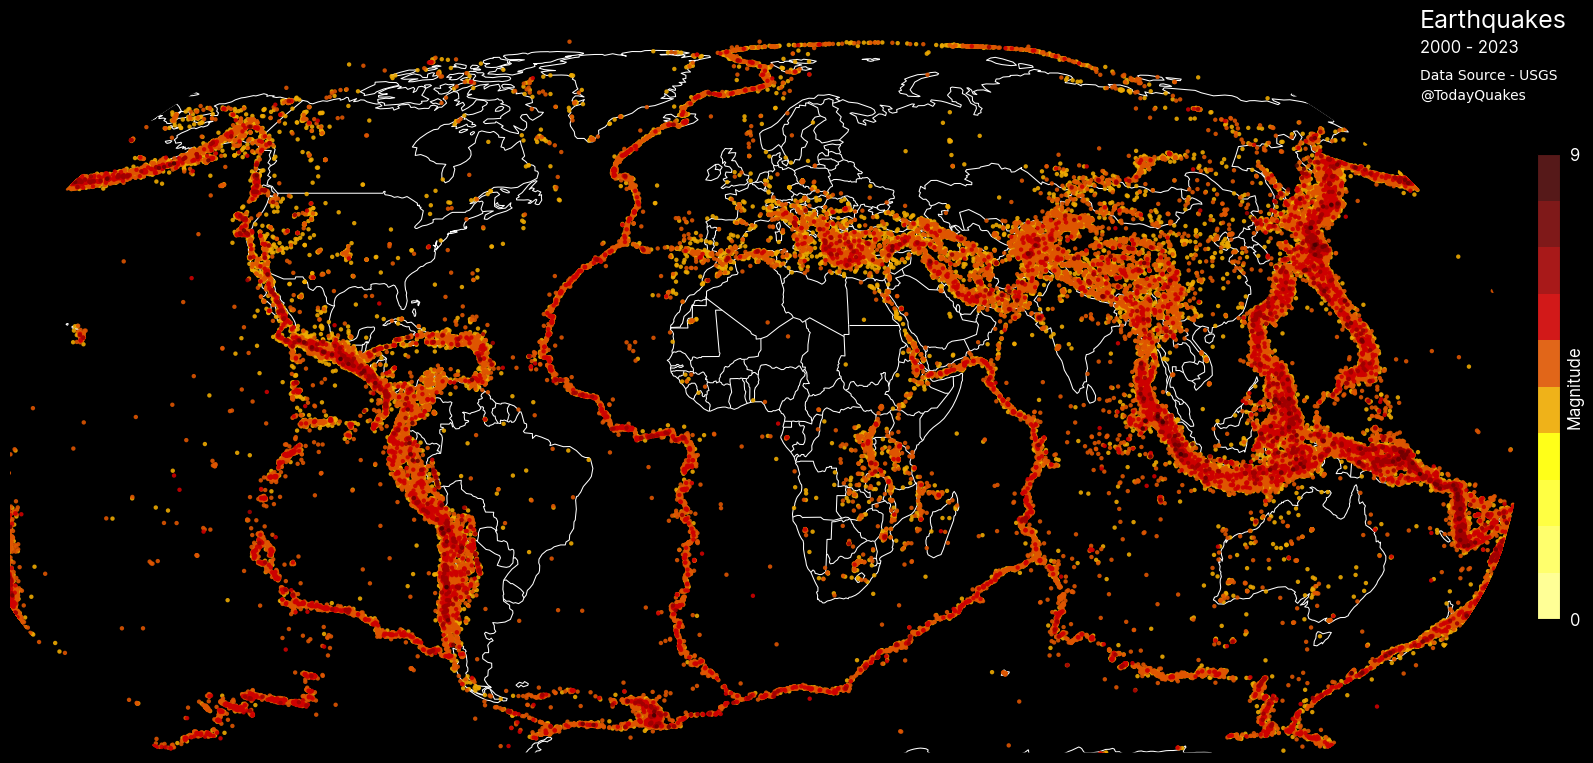

In [ ]:
# Create a custom color palette
colors = ["#FFFF8B", "yellow", "#CD0000", "#430000"]
n_bins = 10
cmap_name = "custom_hot"

# Create the colormap
custom_hot = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Load the data
df = pd.read_parquet("2000_2023.parquet")
filtered_df = df[df["Magnitude"] > 4]  # noqa: PLR2004
filtered_df = filtered_df.sort_values(by="Magnitude")

fig, ax = plt.subplots(facecolor="black",
                       subplot_kw={"projection": ccrs.Robinson()},
                       figsize=(20, 20))
ax.patch.set_facecolor("black")

# Add continent outlines
ax.add_feature(cfeature.LAND, edgecolor="white", facecolor="none", linewidth=0.75, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor="white", facecolor="none", linewidth=0.75, zorder=2)

# Use scatter to create a mappable object
scatter = ax.scatter(filtered_df["Longitude"], filtered_df["Latitude"], transform=ccrs.PlateCarree(),
                     s=10,
                     c=filtered_df["Magnitude"],
                     cmap=custom_hot,
                     vmin=0, vmax=9,
                     alpha=0.9, edgecolors="none", zorder=3)

plt.setp(ax.spines.values(), color="black")
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color="black")
ax.set_xlim(-16000000, 17000000)
ax.set_ylim(-7000000, 9000000)

# Add a color bar to indicate the magnitude scale
cbar = plt.colorbar(scatter, fraction=0.015, pad=0.01)
cbar.set_label("Magnitude", color="white", fontname="Inter", fontsize=12, labelpad=-10)
plt.setp(cbar.ax.get_yticklabels(), color="white", fontname="Inter", fontsize=12)
cbar.set_ticks([0, 9])
cbar.set_ticklabels(["0", "9"])

fig.text(0.83, 0.672, "Earthquakes", color="white", ha="left", va="bottom", fontsize=18, fontname="Inter")
fig.text(0.83, 0.66, "2000 - 2023", color="white", ha="left", va="bottom", fontsize=12, fontname="Inter")

fig.text(0.83, 0.647, "Data Source - USGS", color="white", ha="left", va="bottom", fontsize=10)
fig.text(0.83, 0.637, "@TodayQuakes", color="white", ha="left", va="bottom", fontsize=10)

plt.savefig("assets/earthquakes_2000_2023.png", dpi=500, bbox_inches="tight", facecolor="black")

plt.show()